In [1]:
from corda import reaction_confidence
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
model = "/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/fba/2017-12-16-model-2/data/HM1_homologues/HM1_model/HM1_iJO1366.xml"
genes = "/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/DE/data/processed_counts/2018-01-29_combined_counts.csv"

In [3]:
hm01_genes=pd.read_csv(genes)
hm01_genes = hm01_genes[["MG1655", "HM01_UR_RPKM", "HM01_UTI_RPKM"]].dropna()
hm01_genes.set_index("MG1655", inplace=True)
hm01_genes.head()

//anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717 DtypeWarning: Columns (6,8,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.


,HM01_UR_RPKM,HM01_UTI_RPKM
MG1655,,
b0689,11.59,2.52
b3021,110.56,1.64
b3022,214.17,11.87
b0341,8.62,3.30
b1730,5.33,0.81


In [4]:
def invnorm(x):
    return scipy.stats.norm.ppf((x.rank() -0.5)/x.count())

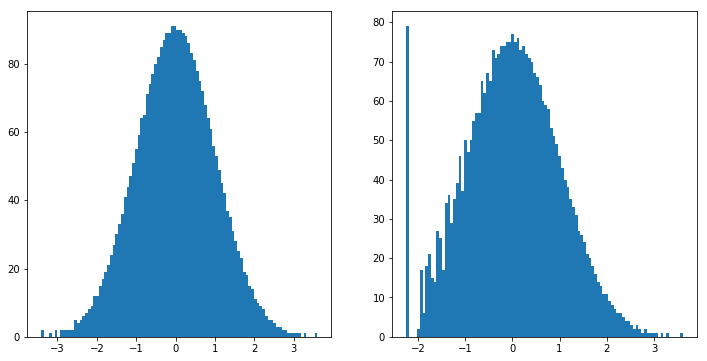

In [5]:
hm01=hm01_genes.apply(invnorm)
hm01.head()
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 6))

ax0.hist(hm01.HM01_UR_RPKM,100);

ax1.hist(hm01.HM01_UTI_RPKM,100);

In [6]:
# Let's start with >2:3 1-2:2, -1:1:1, <-1: -1

def assignConfidence(x):
    if x > 2.0:
        return 3
    elif x >1.0:
        return 2
    elif x > -1.0:
        return 1
    elif x <= -1.0:
        return -1


In [7]:

hm01["UR_confidence"] = list(map(assignConfidence, hm01.HM01_UR_RPKM.values))
    #UR_confidenceassignConfidence(test.HM01_UR_RPKM.loc[i])
hm01['UTI_confidence'] = list(map(assignConfidence, hm01.HM01_UTI_RPKM))
hm01.head(50)

,HM01_UR_RPKM,HM01_UTI_RPKM,UR_confidence,UTI_confidence
MG1655,,,,
b0689,-0.938762,-0.398239,1,1
b3021,0.338562,-0.540551,1,1
b3022,0.780714,0.204692,1,1
b0341,-1.058616,-0.310808,-1,1
b1730,-1.329109,-0.789673,-1,1
b3618,-0.232849,0.905007,1,1
b4345,-0.510766,0.074796,1,1
b4346,0.461953,0.576301,1,1
b4348,-0.434554,0.383195,1,1


In [8]:
ur_conf = hm01.UR_confidence.to_dict()

In [9]:
#Read in the model
from __future__ import print_function
import cobra
base = cobra.io.read_sbml_model(model)

In [14]:
conf = {}
for r in base.reactions:
    conf[r.id]=reaction_confidence(r.gene_reaction_rule, ur_conf)


In [17]:
from corda import CORDA
opt = CORDA(base, conf,)
opt.build()
opt

In [16]:
print([opt.model.reactions.get_by_id(k).reaction for k, used in opt.included.items() if used])

['5mtr_e --> ', 'ac_e --> ', 'asp_DASH_L_e --> ', 'cit_e --> ', 'co2_e <=> ', 'dha_e --> ', 'for_e --> ', 'glc_DASH_D_e <=> ', 'glu_DASH_L_e --> ', 'gly_e --> ', 'h_e <=> ', 'h2o_e <=> ', 'h2s_e --> ', 'mal_DASH_L_e --> ', 'nh4_e <=> ', 'o2_e <=> ', 'so4_e <=> ', 'spmd_e --> ', '12ppd_DASH_R_e <=> 12ppd_DASH_R_p', '12ppd_DASH_S_e <=> 12ppd_DASH_S_p', '23camp_e <=> 23camp_p', '23ccmp_e <=> 23ccmp_p', '23cgmp_e <=> 23cgmp_p', '23cump_e <=> 23cump_p', '23dappa_e <=> 23dappa_p', '26dap_DASH_M_e <=> 26dap_DASH_M_p', '34dhpac_e <=> 34dhpac_p', '3amp_e <=> 3amp_p', '3cmp_e <=> 3cmp_p', '3gmp_e <=> 3gmp_p', '3hpp_e <=> 3hpp_p', 'LalaDgluMdap_e <=> LalaDgluMdap_p', '3ump_e <=> 3ump_p', '4hoxpacd_e <=> 4hoxpacd_p', 'LalaDgluMdapDala_e <=> LalaDgluMdapDala_p', '5dglcn_e <=> 5dglcn_p', '5mtr_e <=> 5mtr_p', '5mtr_c + h_c --> 5mtr_p + h_p', '4abut_e <=> 4abut_p', 'acac_e <=> acac_p', 'acald_e <=> acald_p', 'acgal1p_e <=> acgal1p_p', 'acgal_e <=> acgal_p', 'acgam1p_e <=> acgam1p_p', 'acgam_e <=> acga

In [24]:
to_keep = base.reactions.get_by_id("Ec_biomass_iJO1366_core_53p95M").reaction


In [ ]:
opt2 =  CORDA(base, conf, met_prod=to_keep)
opt2.build()
print(opt2)

In [100]:
base

Name,HM1_iJO1366
Memory address,0x0118e1fe80
Number of metabolites,1805
Number of reactions,2516
Objective expression,-1.0*Ec_biomass_iJO1366_core_53p95M_reverse_e94eb + 1.0*Ec_biomass_iJO1366_core_53p95M
Compartments,"Cytoplasm, Extracellular, Periplasm"


In [101]:
opt.model

Name,HM1_iJO1366
Memory address,0x011bcbee80
Number of metabolites,1805
Number of reactions,2516
Objective expression,0
Compartments,"Cytoplasm, Extracellular, Periplasm"


In [104]:
opt.model.objective=base.objective = "Ec_biomass_iJO1366_core_53p95M"

In [105]:
opt.model

Name,HM1_iJO1366
Memory address,0x011bcbee80
Number of metabolites,1805
Number of reactions,2516
Objective expression,-1.0*Ec_biomass_iJO1366_core_53p95M_reverse_e94eb + 1.0*Ec_biomass_iJO1366_core_53p95M
Compartments,"Cytoplasm, Extracellular, Periplasm"


In [106]:
opt.model.optimize().objective_value

0.0